## Import Data

In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
from collections import Counter

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from scipy import stats

import seaborn as sns

from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import xgboost
from xgboost import XGBRegressor, plot_importance 

In [3]:
# Download data
df_house_price_sample=pd.read_csv('house_price_sample_submission.csv')
df_house_price_test=pd.read_csv('house_price_test.csv')
df_house_price_train=pd.read_csv('house_price_train.csv')
df_house_price_train.drop(columns='Id',inplace=True)
df_house_price_test.drop(columns='Id',inplace=True)
df_house_price_sample.drop(columns='Id',inplace=True)
df_house_price_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_house_price_train.shape

(1460, 80)

In [5]:
df_house_price_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
df_house_price_test.shape

(1459, 79)

In [7]:
df_house_price_sample.head()

,SalePrice
0,169277.052498
1,187758.393989
2,183583.683570
3,179317.477511
4,150730.079977


In [8]:
# Combine test and merge with train
df_house_price_test_sample=pd.concat([df_house_price_test,df_house_price_sample], axis=1)
df_house_price_test_sample.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,169277.052498
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,187758.393989
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,183583.683570
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,179317.477511
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,150730.079977


In [9]:
df_house_price_test_sample.shape

(1459, 80)

In [10]:
df_house_price_train=pd.concat([df_house_price_train,df_house_price_test_sample], axis=0)
df_house_price_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [11]:
df_house_price_train.shape

(2919, 80)

In [12]:
df_house_price_train.reset_index(inplace=True)
df_house_price_train=df_house_price_train.drop(columns=['index'])

In [13]:
df_house_price_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [14]:
# df_house_price_train=df_house_price_train.drop(columns=['level_0'])

## Exploratory Data Analysis

#### Initial Data Exploration:
#### Objects

In [15]:
# Correctly set Mo and Yr as strings for label encoding
df_house_price_train['MoSold']=df_house_price_train['MoSold'].astype('str')
df_house_price_train['YrSold']=df_house_price_train['YrSold'].astype('str')
df_house_price_train['MSSubClass']=df_house_price_train['MSSubClass'].astype('str')

In [16]:
# Object Dataframe Preview
df_house_price_train_objects=df_house_price_train.select_dtypes(include=['object'])
df_house_price_train_objects.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,TA,TA,Y,NaN,NaN,NaN,2,2008,WD,Normal
1,20,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,TA,TA,Y,NaN,NaN,NaN,5,2007,WD,Normal
2,60,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,TA,TA,Y,NaN,NaN,NaN,9,2008,WD,Normal
3,70,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,TA,TA,Y,NaN,NaN,NaN,2,2006,WD,Abnorml
4,60,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,TA,TA,Y,NaN,NaN,NaN,12,2008,WD,Normal


In [17]:
df_house_price_train_objects.describe()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
count,2919,2915,2919,198,2919,2919,2917,2919,2919,2919,...,2760,2760,2919,10,571,105,2919,2919,2918,2919
unique,16,5,2,2,4,4,2,5,3,25,...,5,5,3,3,4,4,12,5,9,6
top,20,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,TA,TA,Y,Gd,MnPrv,Shed,6,2007,WD,Normal
freq,1079,2265,2907,120,1859,2622,2916,2133,2778,443,...,2604,2654,2641,4,329,95,503,692,2525,2402


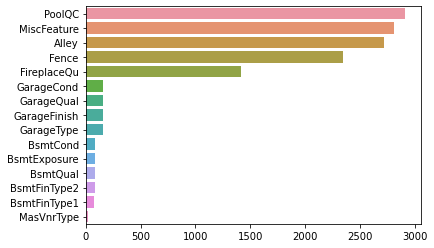

In [18]:
# Bar chart of missing values for objects dataset
df_house_price_train_objects_missing_data=df_house_price_train_objects.isnull().sum().sort_values(ascending=False).head(15)
sns.barplot(y=df_house_price_train_objects_missing_data.index,x=df_house_price_train_objects_missing_data)

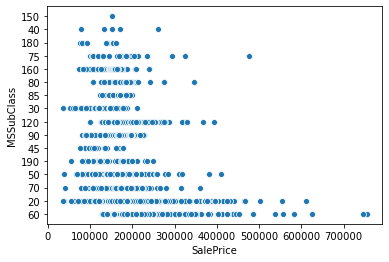

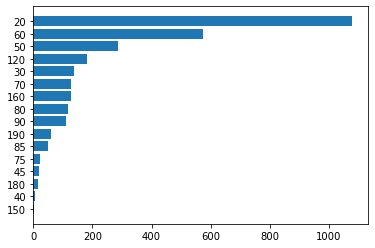

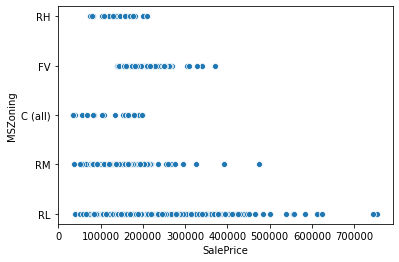

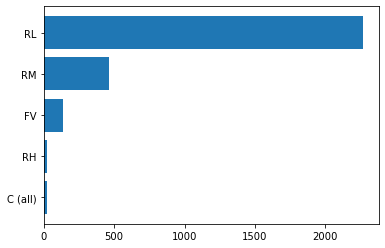

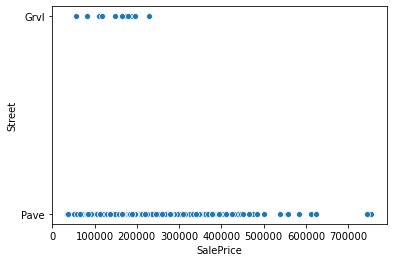

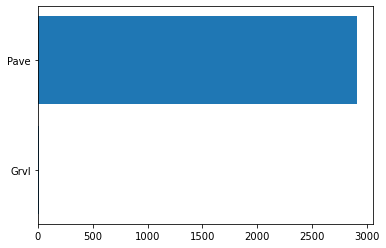

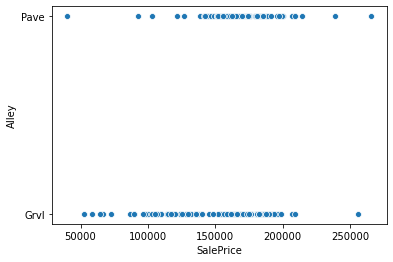

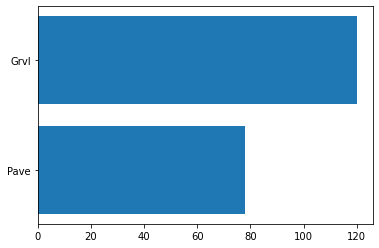

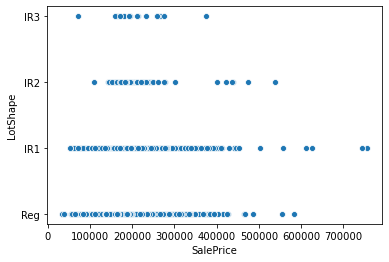

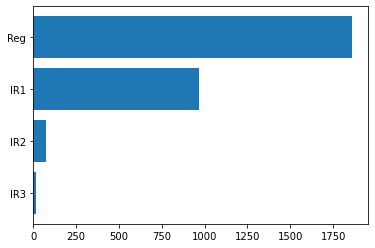

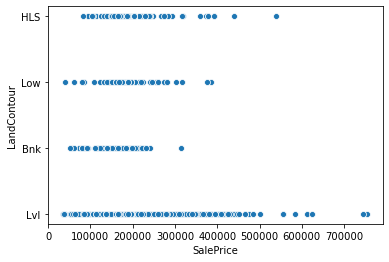

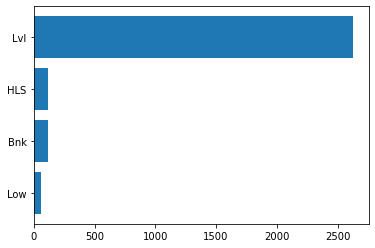

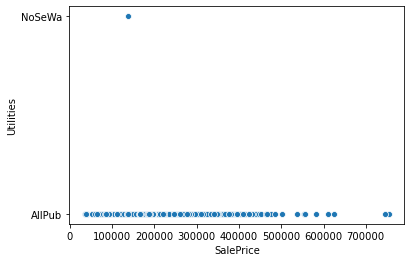

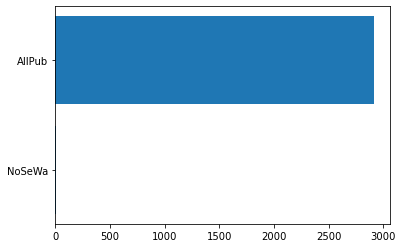

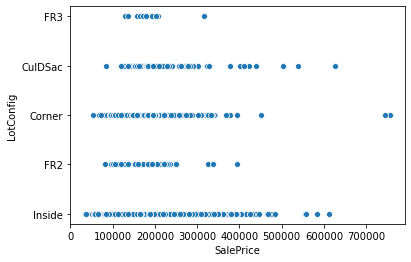

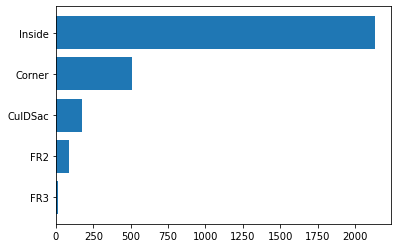

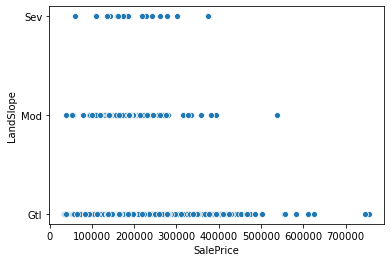

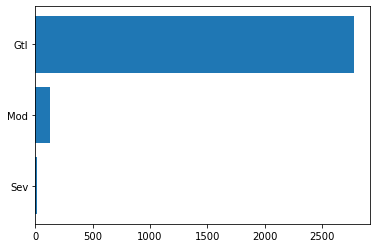

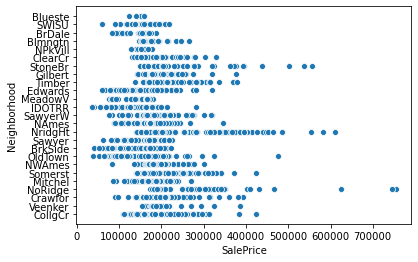

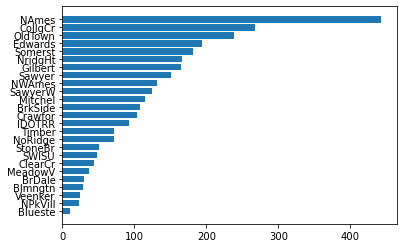

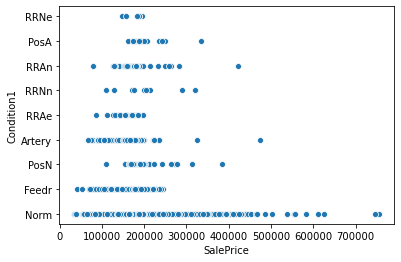

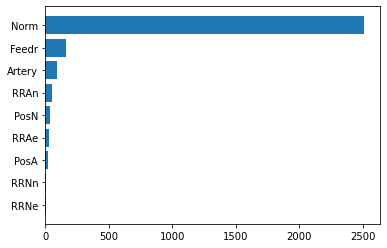

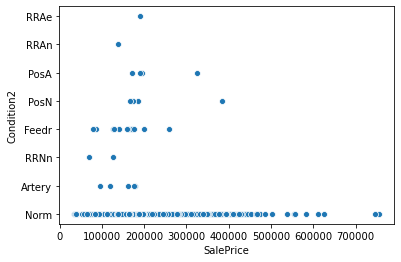

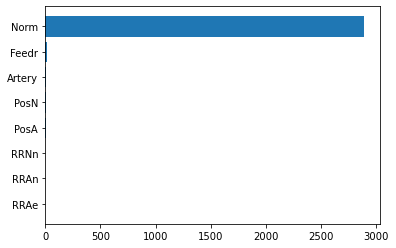

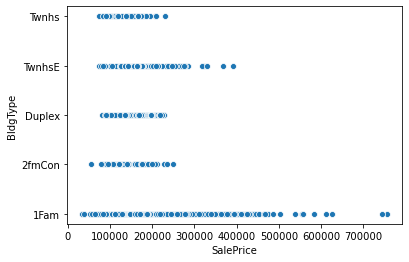

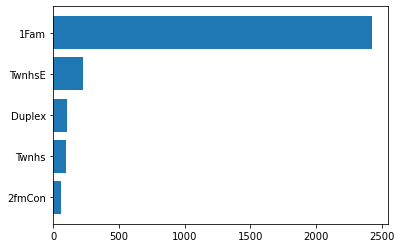

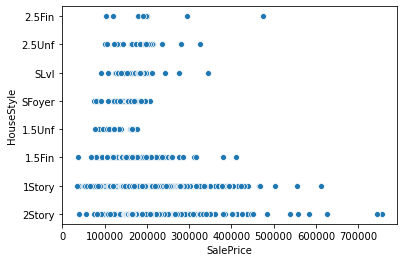

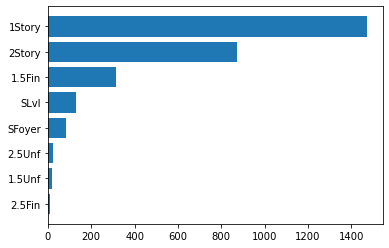

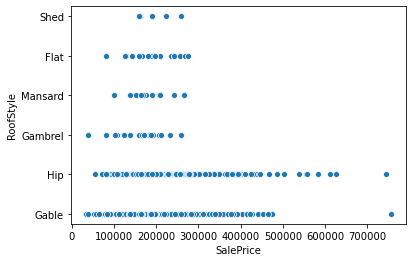

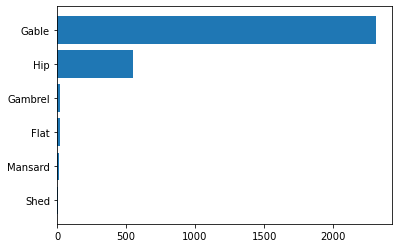

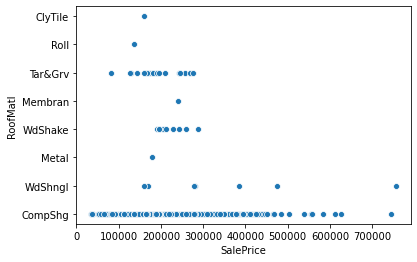

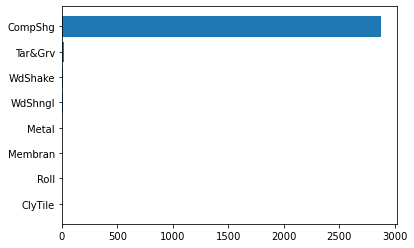

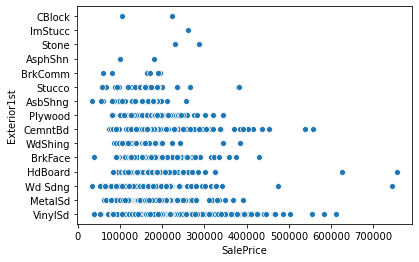

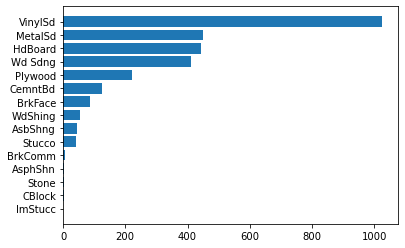

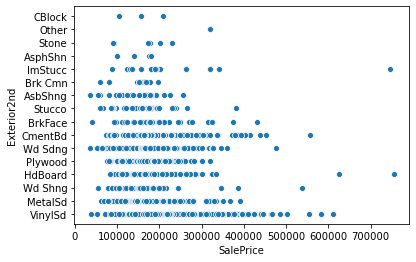

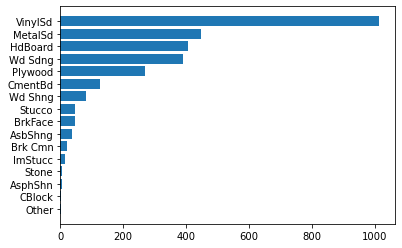

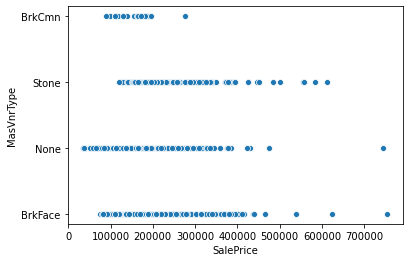

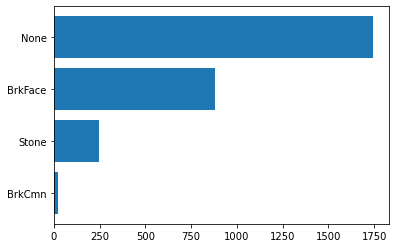

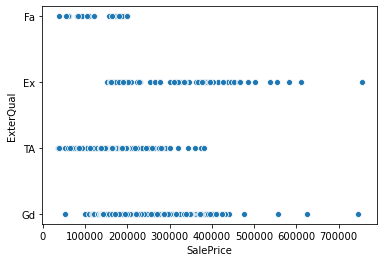

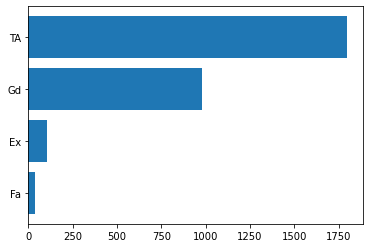

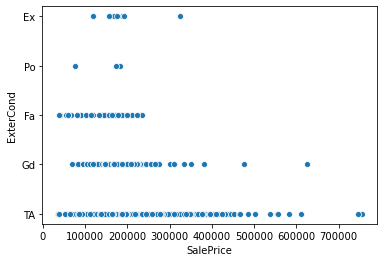

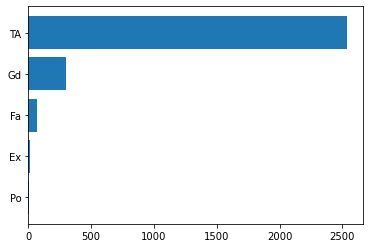

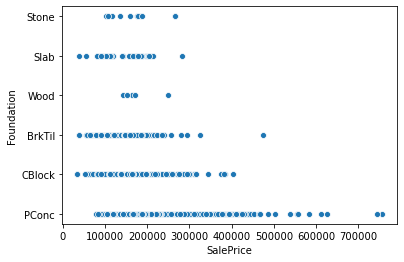

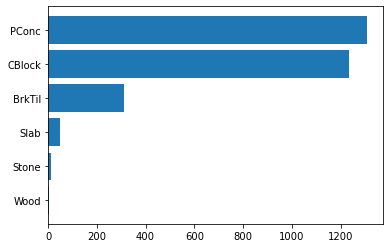

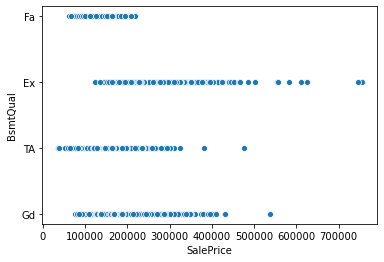

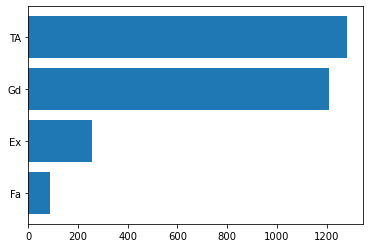

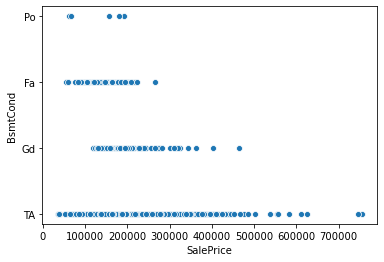

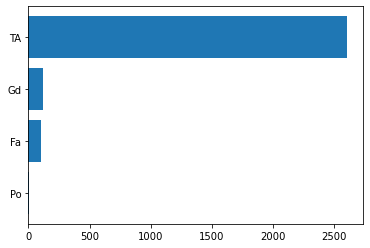

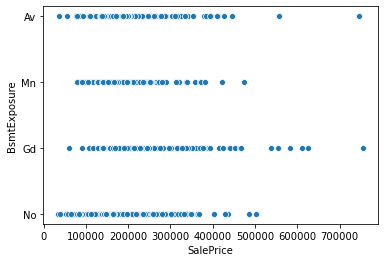

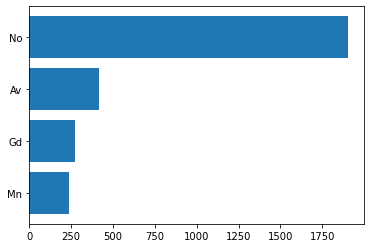

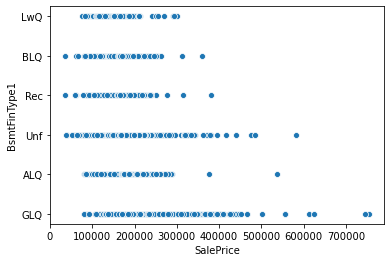

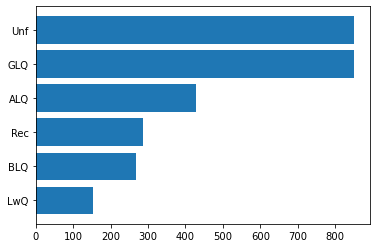

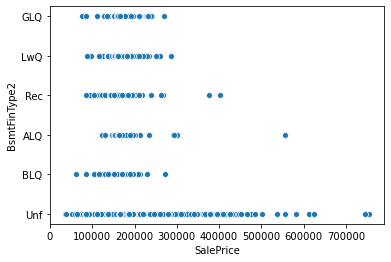

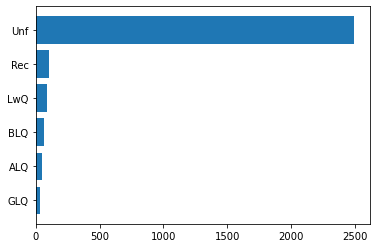

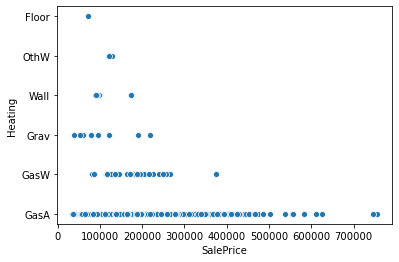

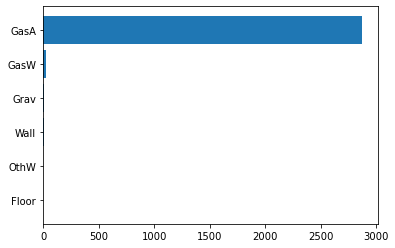

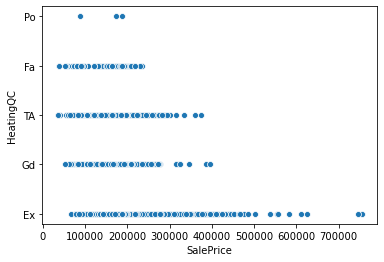

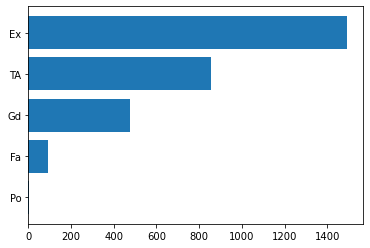

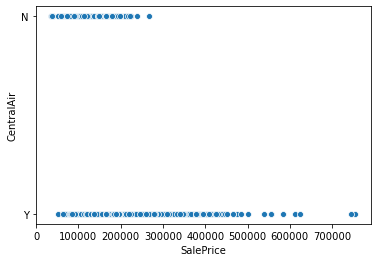

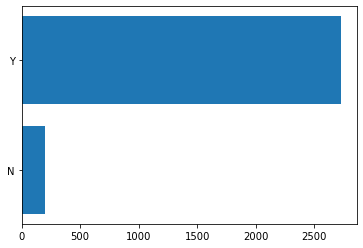

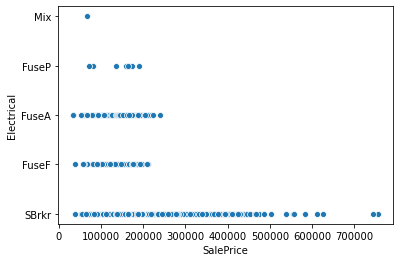

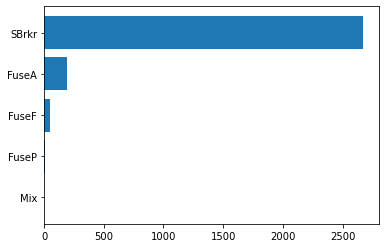

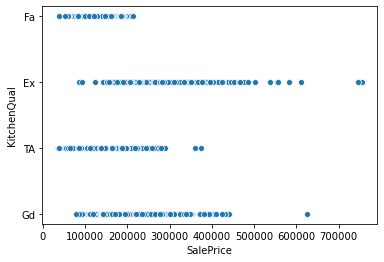

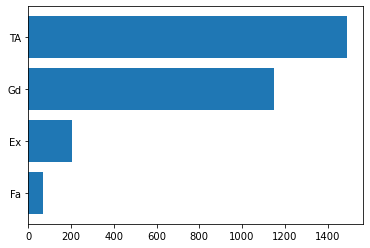

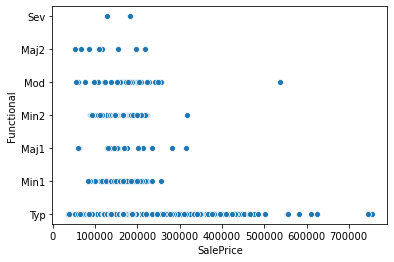

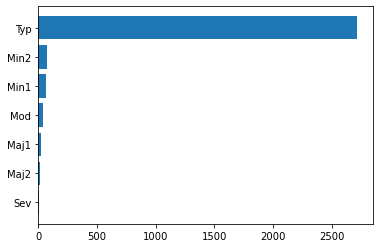

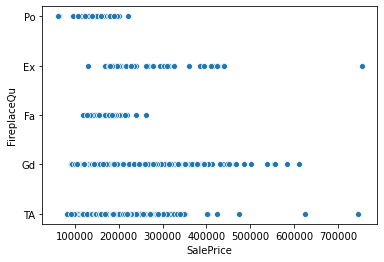

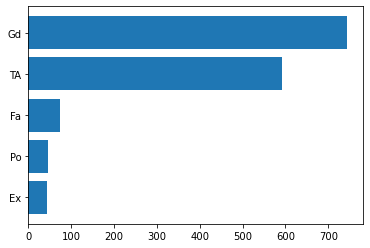

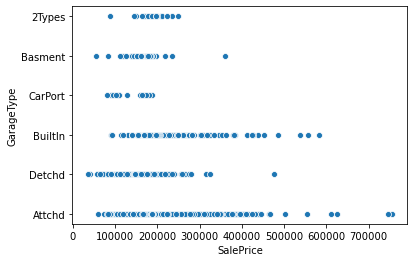

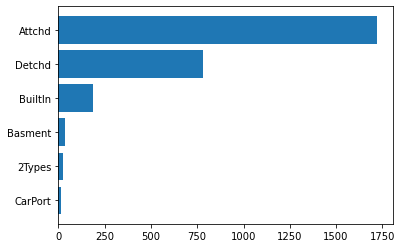

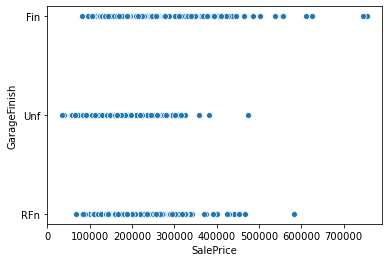

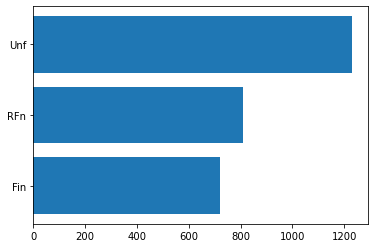

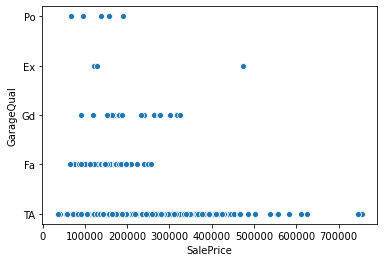

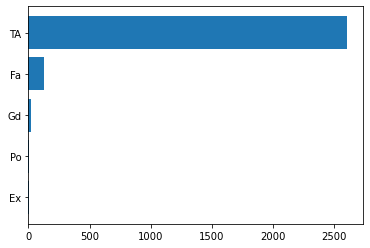

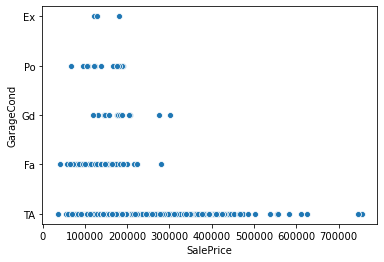

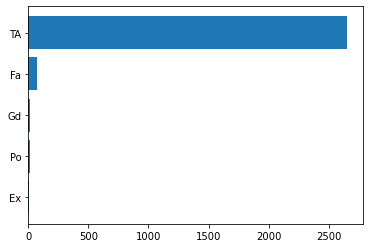

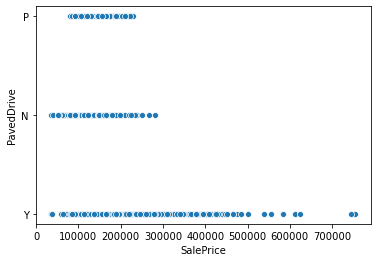

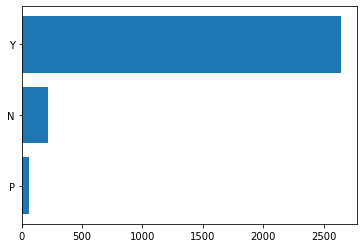

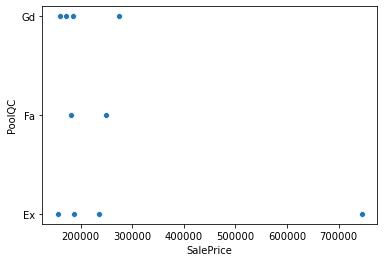

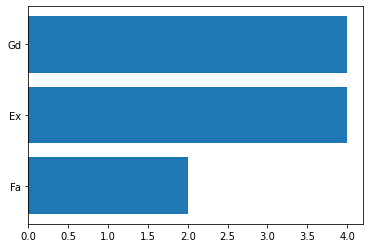

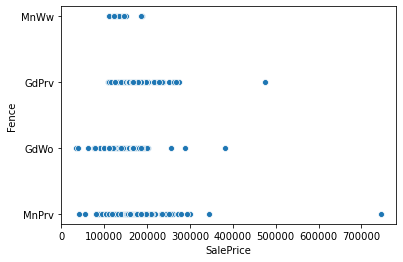

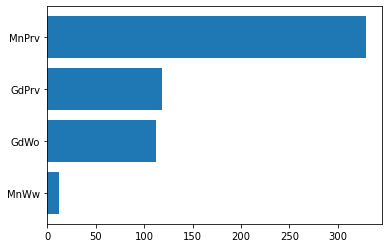

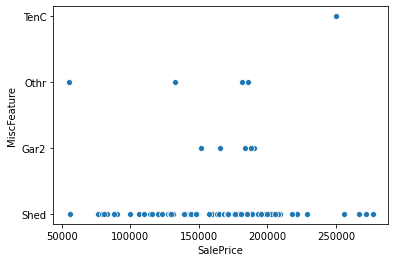

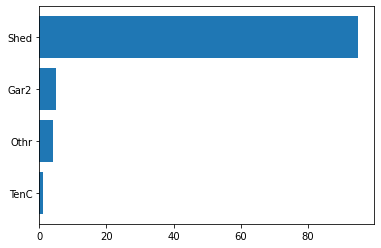

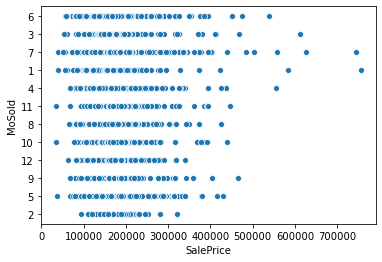

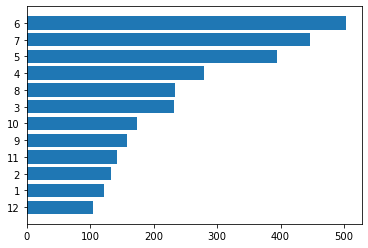

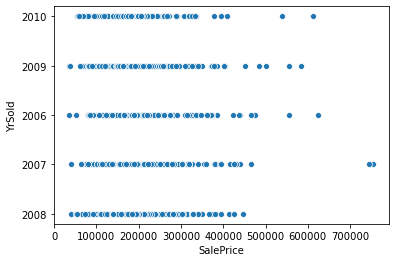

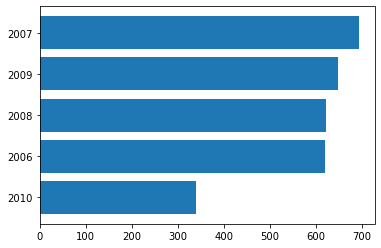

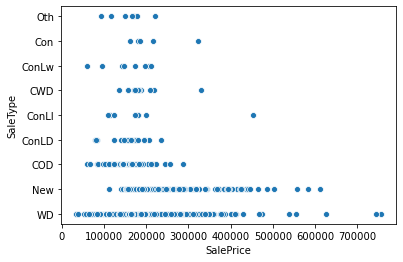

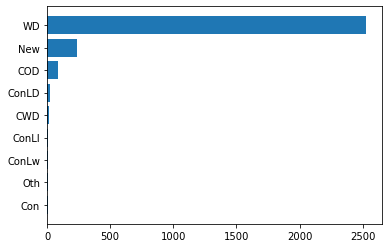

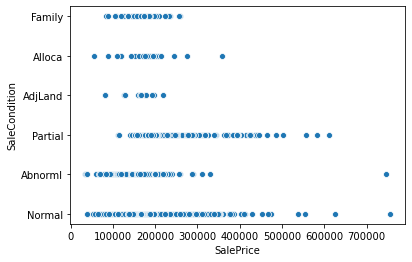

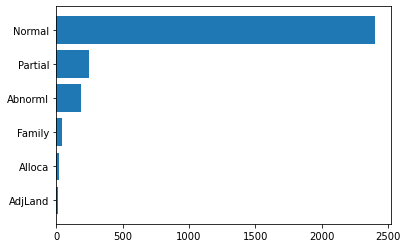

In [19]:
# Scatterplot of Object Dataframe for visualization of categorical distribution
for i in range(len(df_house_price_train_objects.columns)):
    sns.scatterplot(y=df_house_price_train_objects.columns[i],x=df_house_price_train['SalePrice'],data=df_house_price_train_objects)
    plt.show()
    df_house_price_train_object_sorted=df_house_price_train_objects[df_house_price_train_objects.columns[i]].value_counts(ascending=True)
    y_pos = np.arange(len(df_house_price_train_object_sorted))
    plt.barh(y_pos,df_house_price_train_object_sorted,tick_label=df_house_price_train_object_sorted.index)
    plt.show()

In [20]:
## Fill NANs with '0's
df_house_price_train_objects_filled=df_house_price_train_objects.fillna('0')

In [21]:
# Columns that will be label encoded
df_house_price_train_objects_filled.columns
# 46 # range(len(df_house_price_train_objects_filled.columns))

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [22]:
# Label encode 'df_house_price_train_objects_filled' dataframe
le = preprocessing.LabelEncoder()

In [23]:
house_price_train_objects_table_encoded=[le.fit_transform(df_house_price_train_objects_filled[df_house_price_train_objects_filled.columns[i]]) for i in range(len(df_house_price_train_objects_filled.columns))]

In [24]:
df_house_price_train_objects_table_encoded=pd.DataFrame(house_price_train_objects_table_encoded,index=df_house_price_train_objects_filled.columns).transpose()

In [25]:
df_house_price_train_objects_table_encoded.shape

(2919, 46)

In [26]:
df_house_price_train_objects_table_encoded.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
0,10,4,1,0,3,3,1,4,0,5,...,5,5,2,0,0,0,4,2,9,4
1,5,4,1,0,3,3,1,2,0,24,...,5,5,2,0,0,0,7,1,9,4
2,10,4,1,0,0,3,1,4,0,5,...,5,5,2,0,0,0,11,2,9,4
3,11,4,1,0,0,3,1,0,0,6,...,5,5,2,0,0,0,4,0,9,0
4,10,4,1,0,0,3,1,2,0,15,...,5,5,2,0,0,0,3,2,9,4


In [27]:
df_house_price_train['SalePrice'].shape

(2919,)

In [28]:
df_house_price_train_objects_table_encoded['SalePrice']=df_house_price_train['SalePrice']
df_house_price_train_objects_table_encoded.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,10,4,1,0,3,3,1,4,0,5,...,5,2,0,0,0,4,2,9,4,208500.0
1,5,4,1,0,3,3,1,2,0,24,...,5,2,0,0,0,7,1,9,4,181500.0
2,10,4,1,0,0,3,1,4,0,5,...,5,2,0,0,0,11,2,9,4,223500.0
3,11,4,1,0,0,3,1,0,0,6,...,5,2,0,0,0,4,0,9,0,140000.0
4,10,4,1,0,0,3,1,2,0,15,...,5,2,0,0,0,3,2,9,4,250000.0


In [29]:
df_house_price_train_objects_table_encoded.shape

(2919, 47)

In [30]:
df_house_price_train_objects_table_encoded.describe()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,7.134293,4.022268,0.995889,0.094553,1.947585,2.776978,0.999657,3.055841,0.053786,12.437136,...,4.632408,1.830764,0.006852,0.471737,0.103460,6.508736,1.792737,8.488181,3.779034,180052.854647
std,3.698608,0.675010,0.063996,0.372966,1.409721,0.704391,0.032062,1.604472,0.248750,5.957992,...,1.223565,0.537299,0.128073,1.025617,0.543122,2.986807,1.314964,1.601206,1.078241,57381.565721
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,5.000000,4.000000,1.000000,0.000000,0.000000,3.000000,1.000000,2.000000,0.000000,7.000000,...,5.000000,2.000000,0.000000,0.000000,0.000000,5.000000,1.000000,9.000000,4.000000,154795.084126
50%,5.000000,4.000000,1.000000,0.000000,3.000000,3.000000,1.000000,4.000000,0.000000,12.000000,...,5.000000,2.000000,0.000000,0.000000,0.000000,7.000000,2.000000,9.000000,4.000000,176734.841494
75%,10.000000,4.000000,1.000000,0.000000,3.000000,3.000000,1.000000,4.000000,0.000000,17.000000,...,5.000000,2.000000,0.000000,0.000000,0.000000,9.000000,3.000000,9.000000,4.000000,191895.744157
max,15.000000,5.000000,1.000000,2.000000,3.000000,3.000000,2.000000,4.000000,2.000000,24.000000,...,5.000000,2.000000,3.000000,4.000000,4.000000,11.000000,4.000000,9.000000,5.000000,755000.000000


In [31]:
## Correlation
df_house_price_train_objects_table_encoded_fit=preprocessing.StandardScaler().fit(df_house_price_train_objects_table_encoded).transform(df_house_price_train_objects_table_encoded)
df_house_price_train_objects_table_encoded_corr=pd.DataFrame(data=df_house_price_train_objects_table_encoded_fit,columns=df_house_price_train_objects_table_encoded.columns).corr()

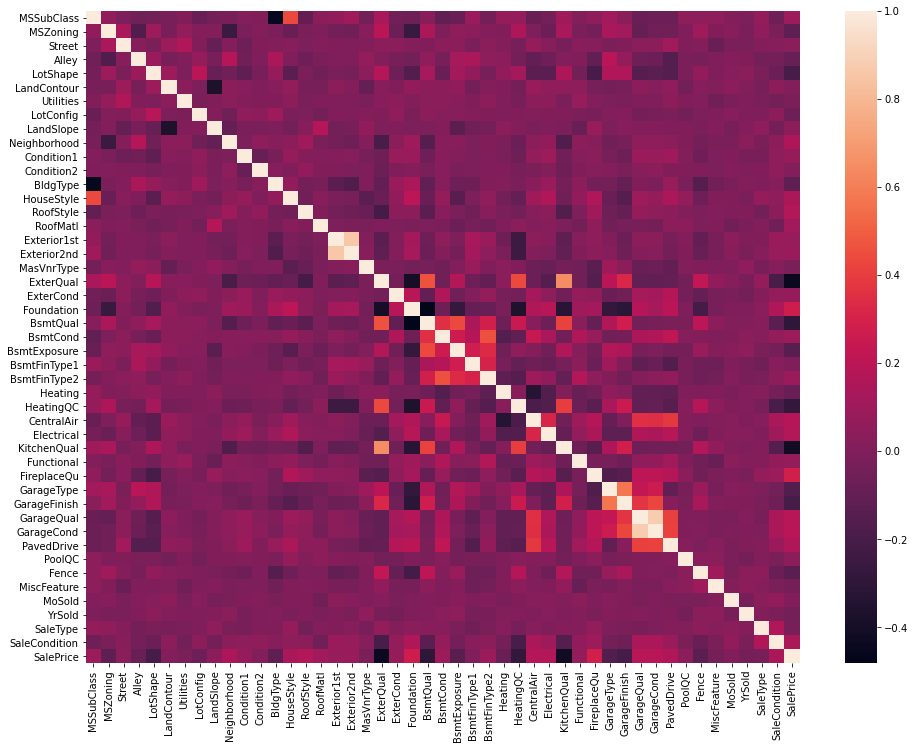

In [32]:
fig,ax=plt.subplots(figsize=(16,12))
sns.heatmap(df_house_price_train_objects_table_encoded_corr)
plt.show()

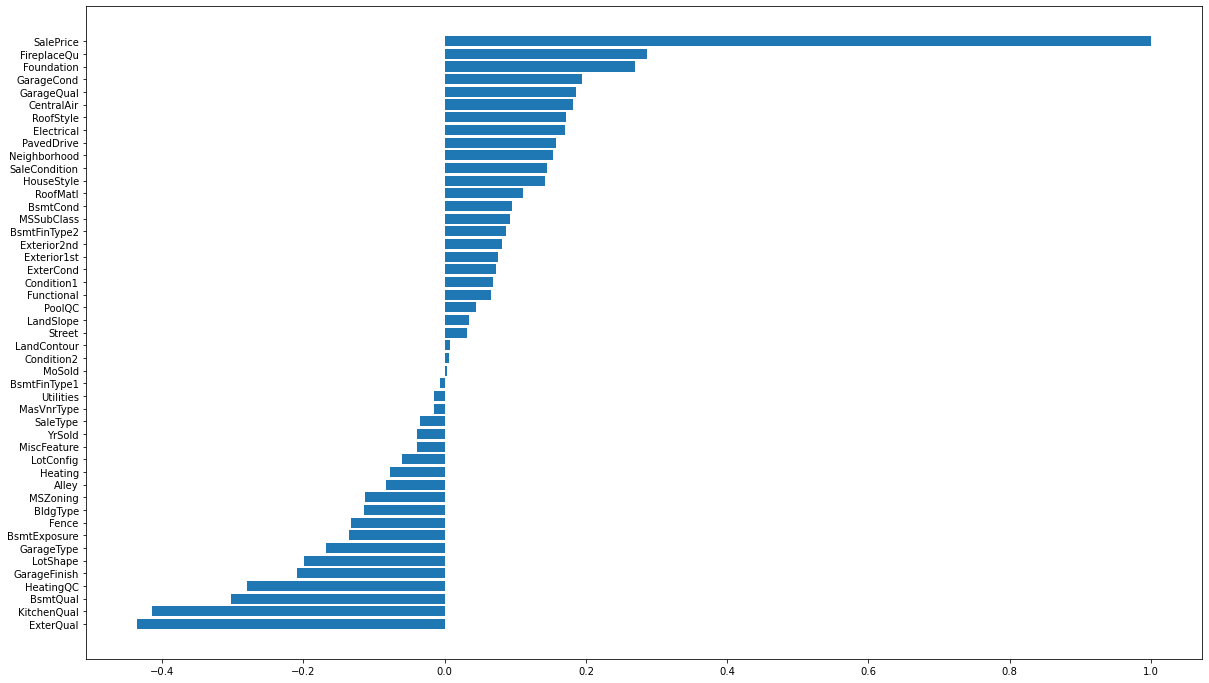

In [33]:
df_house_price_train_objects_table_encoded_corr_saleprice=df_house_price_train_objects_table_encoded_corr['SalePrice'].sort_values()
y_pos = np.arange(len(df_house_price_train_objects_table_encoded_corr_saleprice))
fig,ax=plt.subplots(figsize=(20,12))
plt.barh(y_pos, df_house_price_train_objects_table_encoded_corr_saleprice,tick_label=df_house_price_train_objects_table_encoded_corr_saleprice.index)
plt.show()

#### Numbers

In [34]:
# Numbers Dataset Preview
df_house_price_train_numbers=df_house_price_train.select_dtypes(include=['number'])

In [35]:
df_house_price_train_numbers.dtypes

LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath     float64
BsmtHalfBath     float64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars       float64
GarageArea       float64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
SalePrice        float64
dtype: object

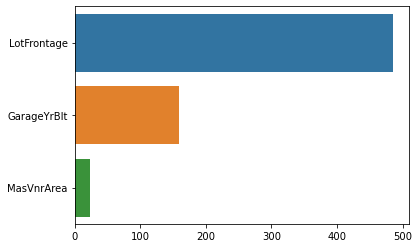

In [36]:
# Bar plot of missing values in the number dataset
df_house_price_train_numbers_missing_data=df_house_price_train_numbers.isnull().sum().sort_values(ascending=False).head(3)
sns.barplot(y=df_house_price_train_numbers_missing_data.index,x=df_house_price_train_numbers_missing_data)

In [37]:
## Replace 'LotFrontage' by median from each neighborhood
df_house_price_train_numbers['LotFrontage']=df_house_price_train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
## Replace missing values to '0's for everything else
df_house_price_train_numbers=df_house_price_train_numbers.fillna('0')

<ipython-input-37-1ebb3d5721fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_house_price_train_numbers['LotFrontage']=df_house_price_train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))


In [38]:
df_house_price_train_numbers=df_house_price_train_numbers.astype('int64')

In [39]:
# Create dataframe of continuous values
df_house_price_train_numbers_continuous = df_house_price_train_numbers[['LotFrontage', 'LotArea',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea' ,
       'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice']]
df_house_price_train_numbers_continuous.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65,8450,2003,2003,196,706,0,150,856,856,...,2003,548,0,61,0,0,0,0,0,208500
1,80,9600,1976,1976,0,978,0,284,1262,1262,...,1976,460,298,0,0,0,0,0,0,181500
2,68,11250,2001,2002,162,486,0,434,920,920,...,2001,608,0,42,0,0,0,0,0,223500
3,60,9550,1915,1970,0,216,0,540,756,961,...,1998,642,0,35,272,0,0,0,0,140000
4,84,14260,2000,2000,350,655,0,490,1145,1145,...,2000,836,192,84,0,0,0,0,0,250000


In [40]:
df_house_price_train_numbers_continuous.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,69.535457,10168.114080,1971.312778,1984.264474,101.396026,441.272011,49.565262,560.579993,1051.417266,1159.581706,...,1870.364166,472.712573,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,180052.602261
std,21.700798,7886.996359,30.291442,20.894344,178.854579,455.606014,169.179104,439.590889,441.120498,392.362079,...,449.686321,215.535686,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,57381.570984
min,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,60.000000,7478.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,...,1957.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,154794.500000
50%,70.000000,9453.000000,1973.000000,1993.000000,0.000000,368.000000,0.000000,467.000000,989.000000,1082.000000,...,1977.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,176734.000000
75%,80.000000,11570.000000,2001.000000,2004.000000,163.500000,733.000000,0.000000,805.000000,1302.000000,1387.500000,...,2001.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,191895.000000
max,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,...,2207.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,755000.000000


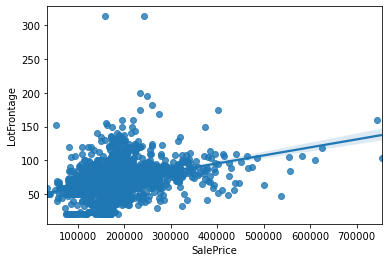

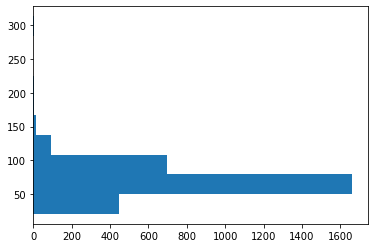

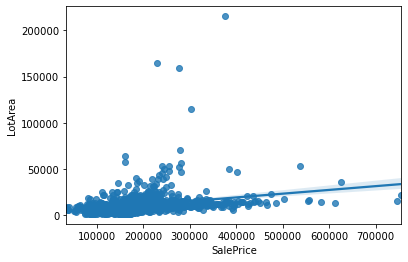

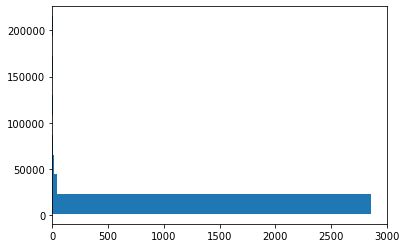

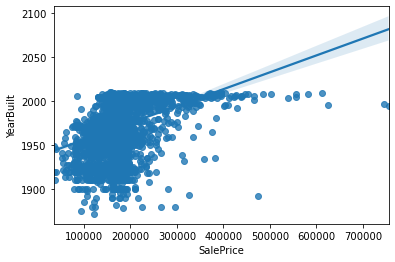

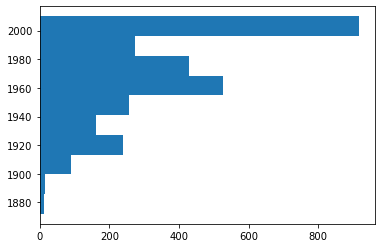

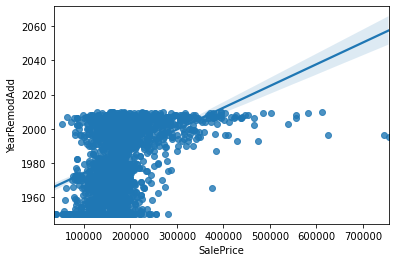

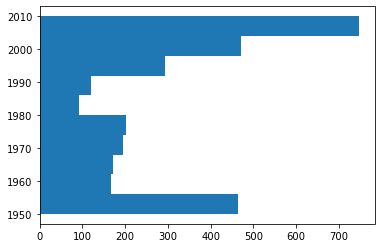

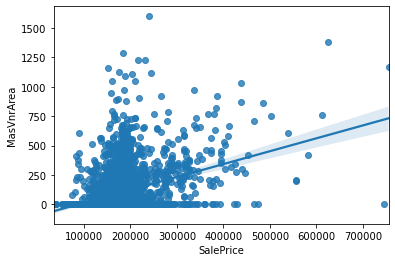

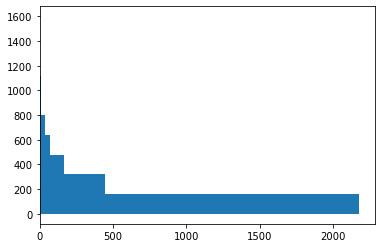

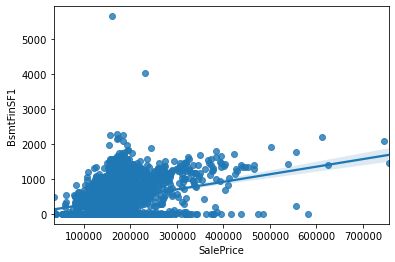

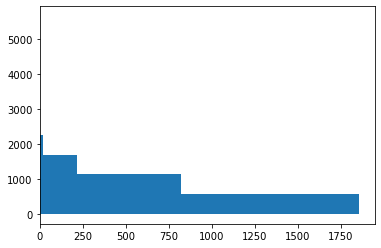

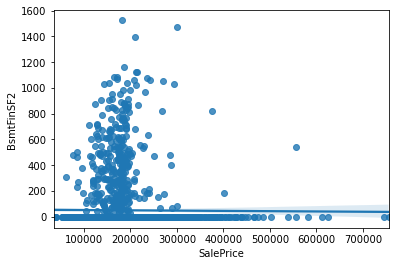

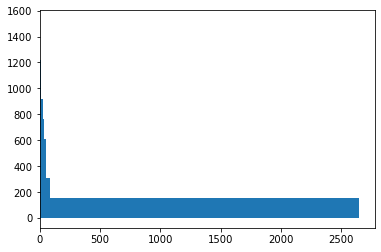

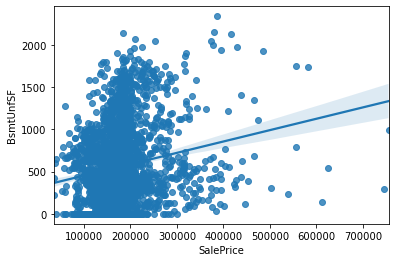

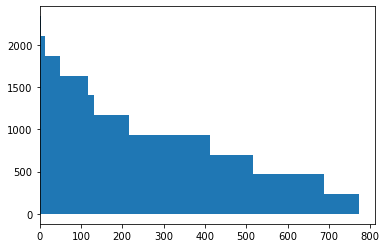

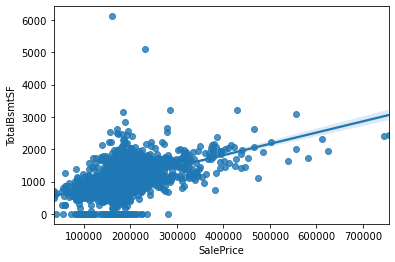

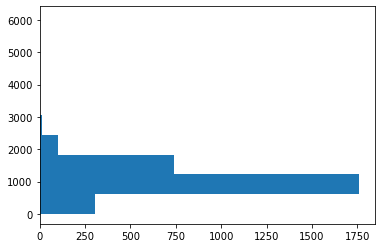

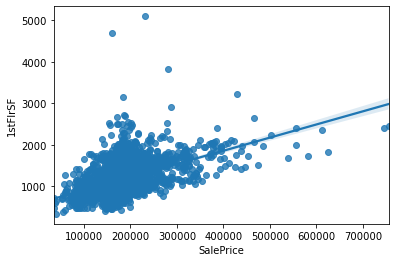

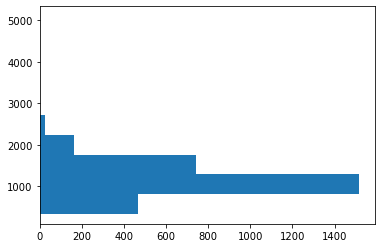

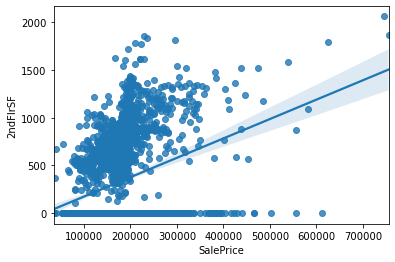

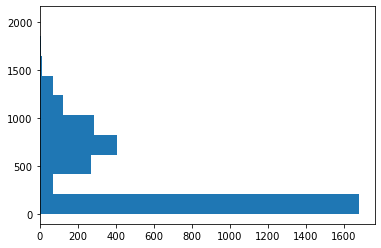

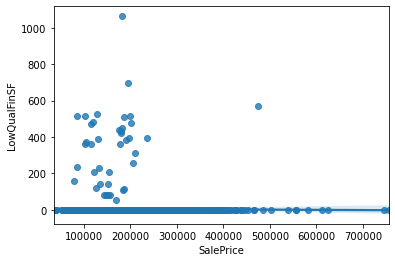

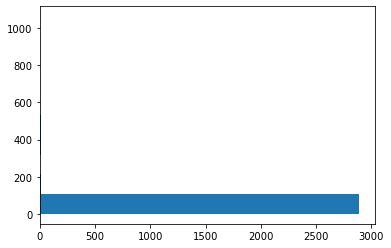

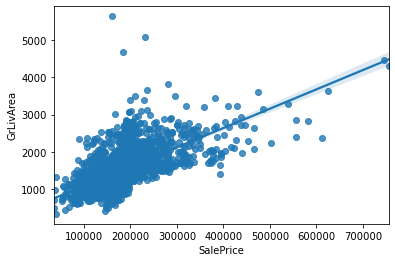

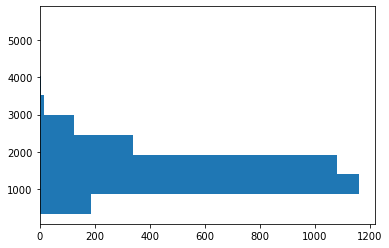

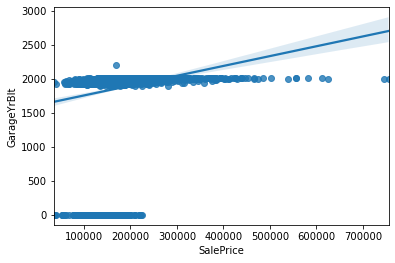

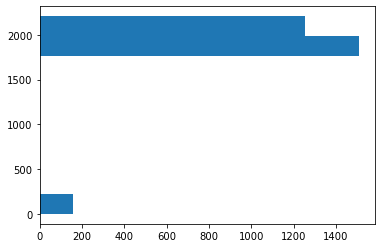

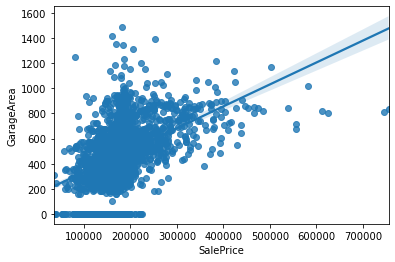

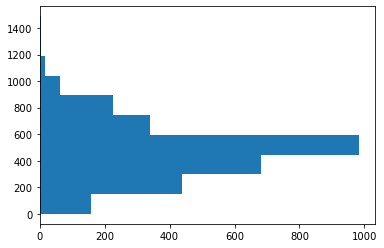

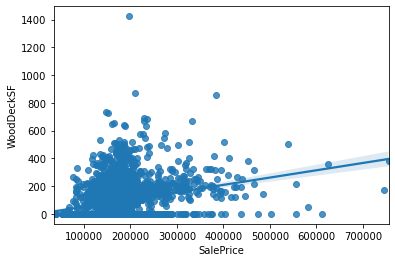

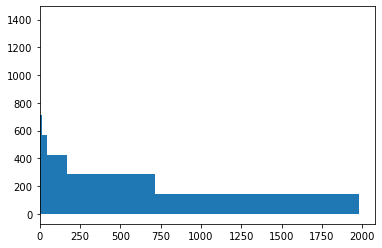

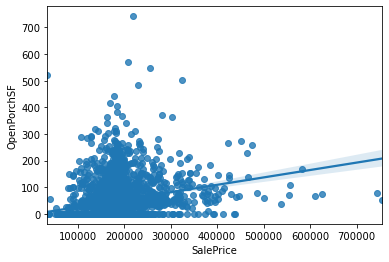

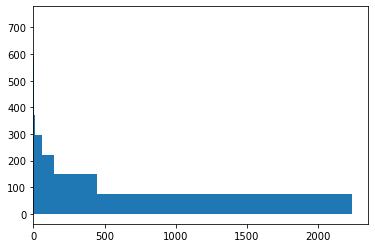

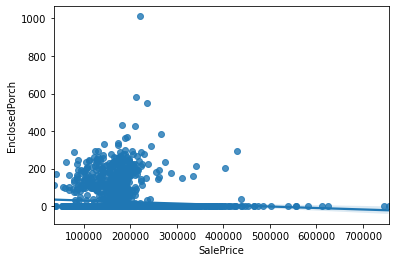

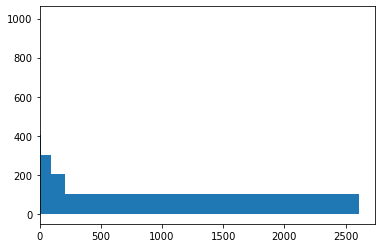

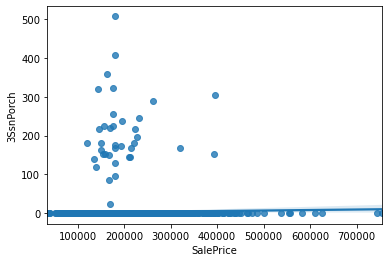

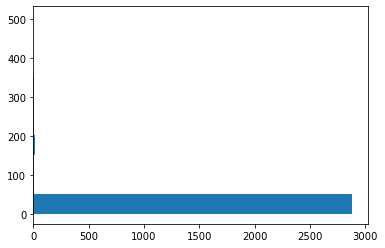

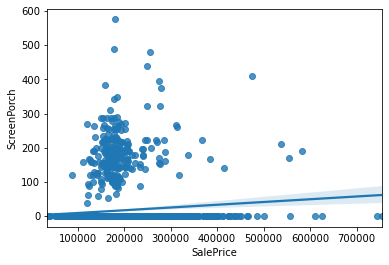

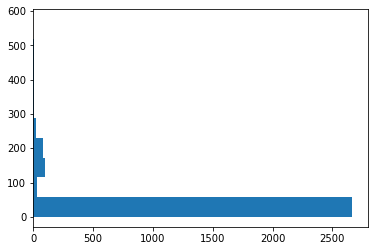

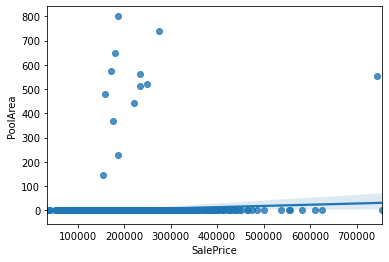

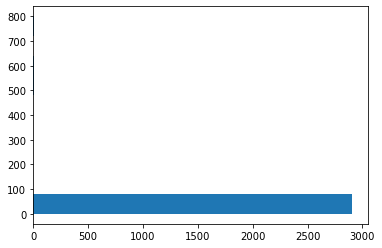

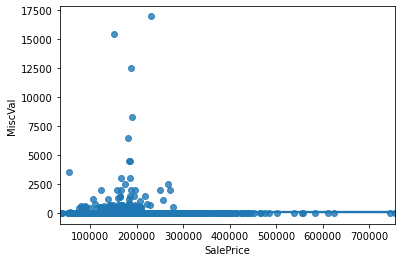

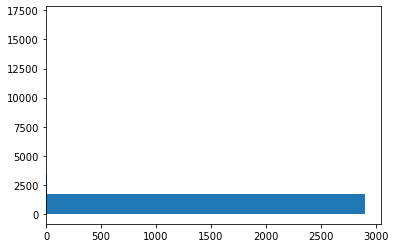

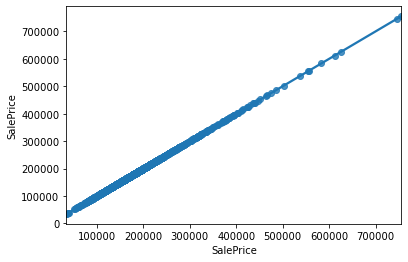

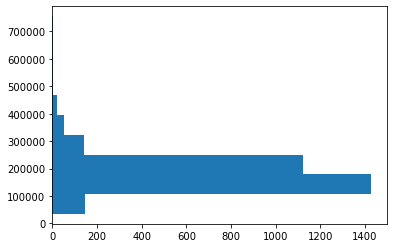

In [41]:
# Add subplots
for i in range(len(df_house_price_train_numbers_continuous.columns)):
    sns.regplot(y=df_house_price_train_numbers_continuous.columns[i],x='SalePrice',data=df_house_price_train_numbers_continuous)
    plt.show()
    plt.hist(df_house_price_train_numbers_continuous[df_house_price_train_numbers_continuous.columns[i]],orientation='horizontal')
    plt.show()

In [42]:
# Remove 'GrLivArea' outliers
df_house_price_train_numbers=df_house_price_train_numbers.drop(df_house_price_train_numbers[(df_house_price_train_numbers['GrLivArea']>4500) & (df_house_price_train_numbers['SalePrice']<300000)].index)

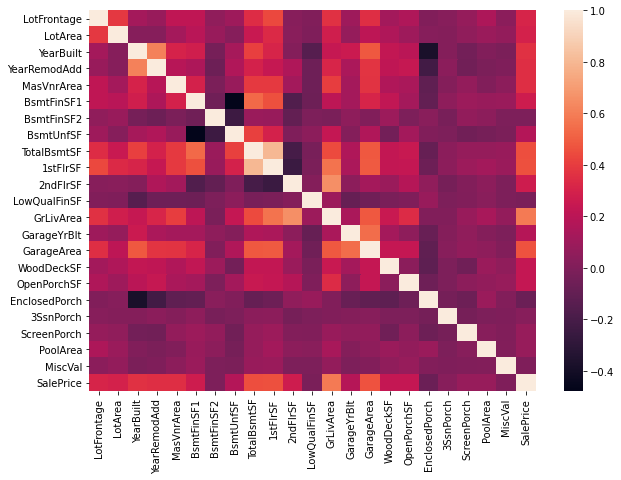

In [43]:
plt.subplots(figsize=(10,7))
df_house_price_train_numbers_continuous_fit=preprocessing.StandardScaler().fit(df_house_price_train_numbers_continuous).transform(df_house_price_train_numbers_continuous)
df_house_price_train_numbers_continuous_corr=pd.DataFrame(data=df_house_price_train_numbers_continuous,columns=df_house_price_train_numbers_continuous.columns).corr()
sns.heatmap(df_house_price_train_numbers_continuous_corr)
plt.show()

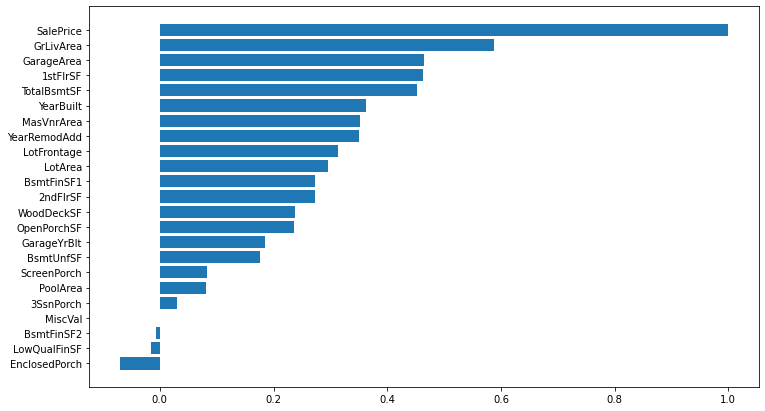

In [44]:
df_house_price_train_numbers_continuous_corr_saleprice=df_house_price_train_numbers_continuous_corr['SalePrice'].sort_values()
plt.subplots(figsize=(12,7))
y_pos = np.arange(len(df_house_price_train_numbers_continuous_corr_saleprice))
plt.barh(y_pos, df_house_price_train_numbers_continuous_corr_saleprice,tick_label=df_house_price_train_numbers_continuous_corr_saleprice.index)
plt.show()

In [45]:
df_house_price_train_numbers_ordinal_columns = list((Counter(df_house_price_train_numbers) - Counter(df_house_price_train_numbers_continuous)).elements())

In [46]:
df_house_price_train_numbers_ordinal=df_house_price_train_numbers[df_house_price_train_numbers_ordinal_columns]

In [47]:
df_house_price_train_numbers_ordinal['SalePrice']=df_house_price_train_numbers_continuous['SalePrice']

<ipython-input-47-049508acd956>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_house_price_train_numbers_ordinal['SalePrice']=df_house_price_train_numbers_continuous['SalePrice']


In [48]:
df_house_price_train_numbers_ordinal

,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,SalePrice
0,7,5,1,0,2,1,3,1,8,0,2,208500
1,6,8,0,1,2,0,3,1,6,1,2,181500
2,7,5,1,0,2,1,3,1,6,1,2,223500
3,7,5,1,0,1,0,3,1,7,1,3,140000
4,8,5,1,0,2,1,4,1,9,1,3,250000
...,...,...,...,...,...,...,...,...,...,...,...,...
2914,4,7,0,0,1,1,3,1,5,0,0,167081
2915,4,5,0,0,1,1,3,1,6,0,1,164788
2916,5,7,1,0,1,0,4,1,7,1,2,219222
2917,5,5,0,1,1,0,3,1,6,0,0,184924


In [49]:
df_house_price_train_numbers_ordinal.describe()

,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,SalePrice
count,2916.000000,2916.000000,2916.000000,2916.000000,2916.000000,2916.000000,2916.000000,2916.000000,2916.000000,2916.000000,2916.000000,2916.000000
mean,6.085048,5.565158,0.428669,0.061043,1.567215,0.379630,2.860425,1.044582,6.445130,0.595679,1.765089,180040.450960
std,1.405076,1.113556,0.523926,0.245113,0.552501,0.502737,0.822954,0.214568,1.556508,0.644359,0.761889,57402.114869
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,34900.000000
25%,5.000000,5.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,154725.250000
50%,6.000000,5.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,176733.000000
75%,7.000000,6.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,191890.000000
max,10.000000,9.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,14.000000,4.000000,5.000000,755000.000000


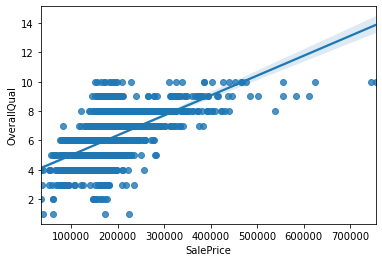

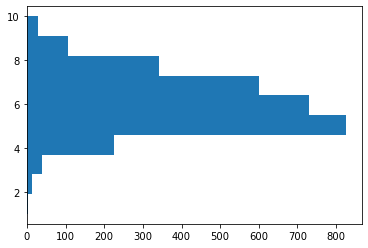

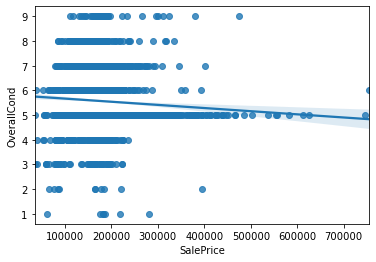

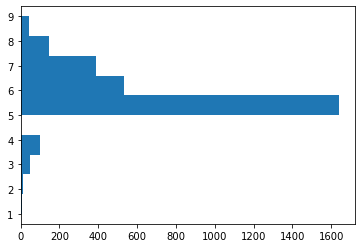

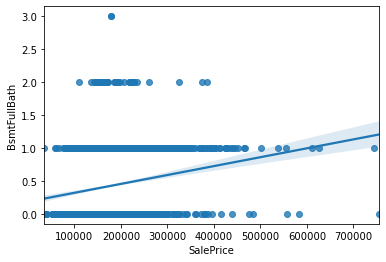

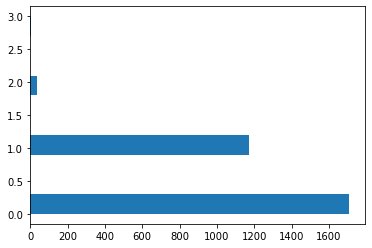

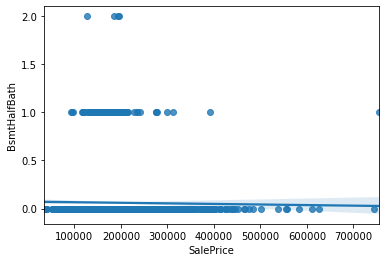

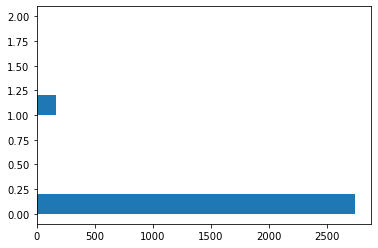

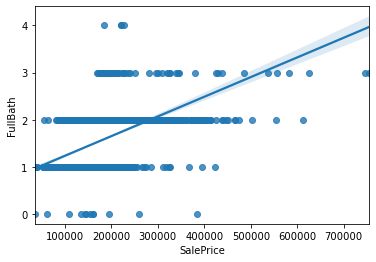

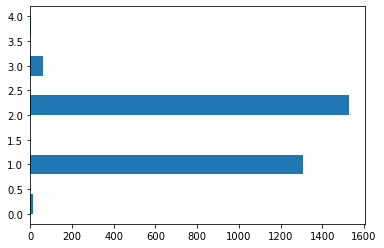

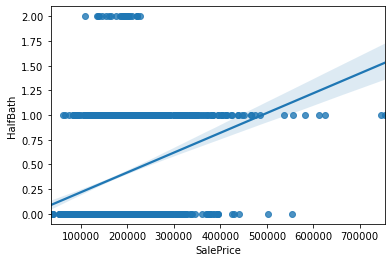

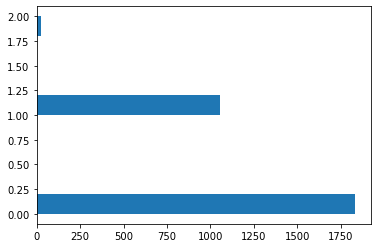

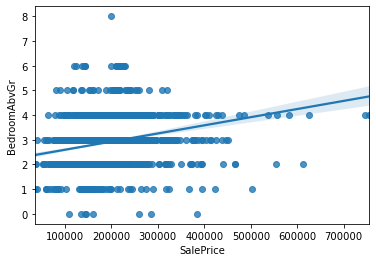

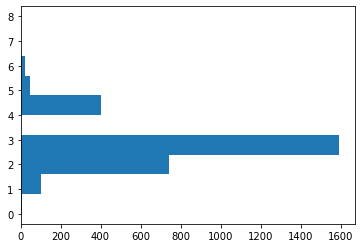

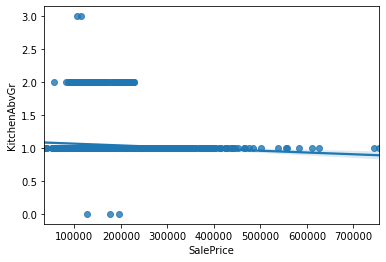

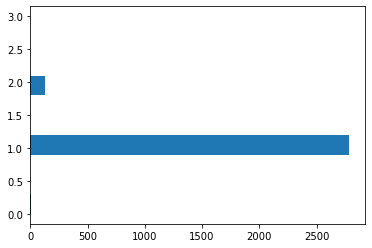

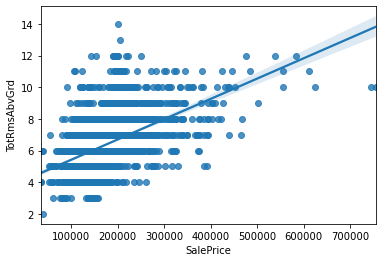

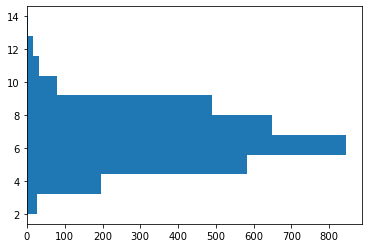

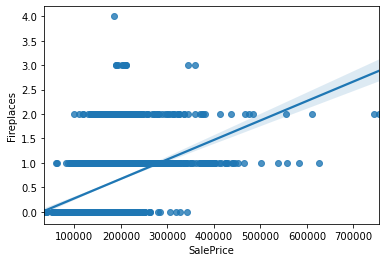

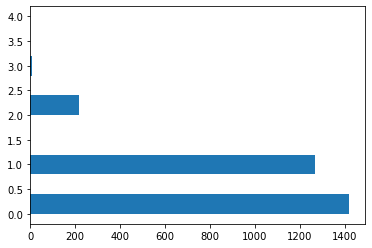

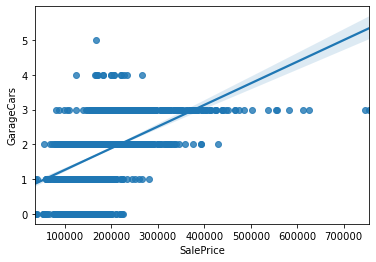

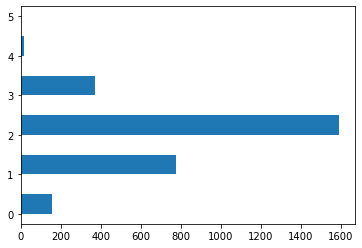

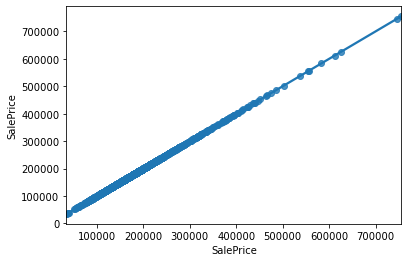

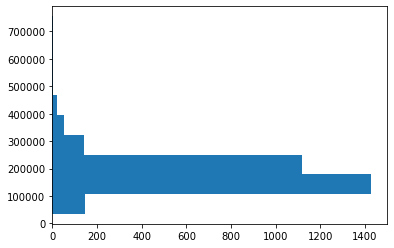

In [50]:
for i in range(len(df_house_price_train_numbers_ordinal.columns)):
    sns.regplot(y=df_house_price_train_numbers_ordinal.columns[i],x='SalePrice',data=df_house_price_train_numbers_ordinal)
    plt.show()
    df_house_price_train_numbers_ordinal_sorted=df_house_price_train_numbers_ordinal[df_house_price_train_numbers_ordinal.columns[i]].value_counts(ascending=True)
    y_pos = np.arange(len(df_house_price_train_numbers_ordinal_sorted))
    plt.hist(df_house_price_train_numbers_ordinal[df_house_price_train_numbers_ordinal.columns[i]],orientation='horizontal')
    plt.show()

In [51]:
# Remove 'OverallQual' outliers
df_house_price_train_numbers=df_house_price_train_numbers.drop(df_house_price_train_numbers[(df_house_price_train_numbers['OverallQual']<5) & (df_house_price_train_numbers['SalePrice']>200000)].index)

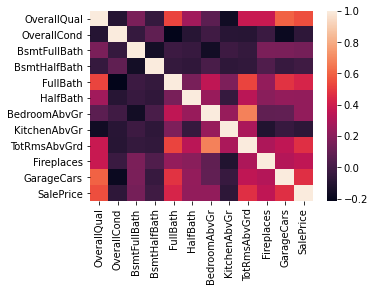

In [52]:
plt.subplots(figsize=(5,3.5))
df_house_price_train_numbers_ordinal_fit=preprocessing.StandardScaler().fit(df_house_price_train_numbers_ordinal).transform(df_house_price_train_numbers_ordinal)
df_house_price_train_numbers_ordinal_corr=pd.DataFrame(data=df_house_price_train_numbers_ordinal_fit,columns=df_house_price_train_numbers_ordinal.columns).corr()
sns.heatmap(df_house_price_train_numbers_ordinal_corr)
plt.show()

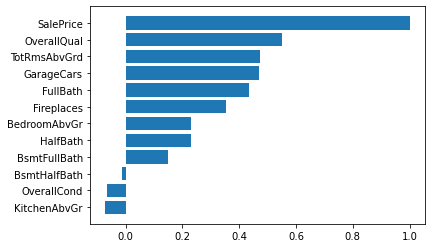

In [53]:
# Grab correlation scores relative to 'SalePrice'
df_house_price_train_numbers_ordinal_corr_saleprice=df_house_price_train_numbers_ordinal_corr['SalePrice'].sort_values(ascending=True)
y_pos = np.arange(len(df_house_price_train_numbers_ordinal_corr_saleprice))
plt.barh(y_pos, df_house_price_train_numbers_ordinal_corr_saleprice,tick_label=df_house_price_train_numbers_ordinal_corr_saleprice.index)
plt.show()

### Data Cleaning and Feature Engineering

Opportunity for more feature engineering after score submitted\

Objects: Create Features

Numbers: Create Features

COmbine dataframes

In [54]:
# Cleaned Dataframe
df_house_prices=pd.concat([df_house_price_train_objects_table_encoded.drop(columns='SalePrice'),df_house_price_train_numbers], axis=1)
df_house_prices.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,10,4,1,0,3,3,1,4,0,5,...,2.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,208500.0
1,5,4,1,0,3,3,1,2,0,24,...,2.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,181500.0
2,10,4,1,0,0,3,1,4,0,5,...,2.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,223500.0
3,11,4,1,0,0,3,1,0,0,6,...,3.0,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,140000.0
4,10,4,1,0,0,3,1,2,0,15,...,3.0,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,250000.0


In [55]:
df_house_prices.shape

(2919, 80)

Fix skews for numbers

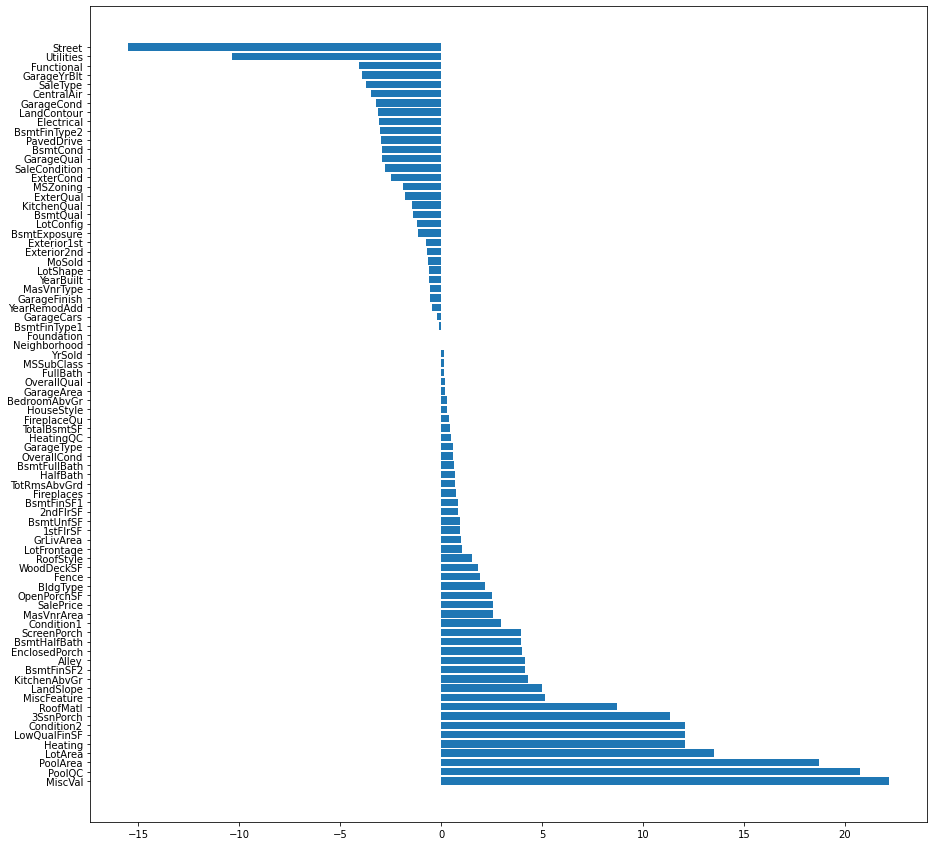

In [56]:
# Find and display skew values for numbers
house_prices_skew=df_house_prices.skew().sort_values(ascending=False)
y_pos = np.arange(len(house_prices_skew))
plt.subplots(figsize=(15,15))
plt.barh(y_pos, house_prices_skew,tick_label=house_prices_skew.index)
plt.show()

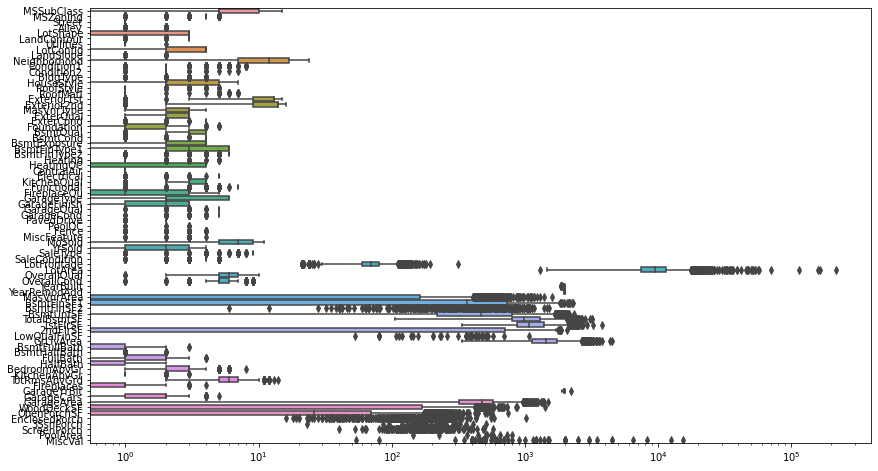

In [57]:
# Box plot for skew of numbers
f, ax = plt.subplots(figsize=(14,8))
ax.set_xscale("log")
sns.boxplot(data=df_house_prices.drop(columns='SalePrice'),orient='h')
plt.show()

In [58]:
# Find and remove features with high skew
house_prices_skew_high=house_prices_skew[house_prices_skew > .5]
house_prices_skew_high

MiscVal          22.180773
PoolQC           20.734650
PoolArea         18.694834
LotArea          13.539368
Heating          12.084999
LowQualFinSF     12.071748
Condition2       12.066294
3SsnPorch        11.359992
RoofMatl          8.712245
MiscFeature       5.127862
LandSlope         4.977715
KitchenAbvGr      4.313446
BsmtFinSF2        4.155167
Alley             4.140513
EnclosedPorch     4.005044
BsmtHalfBath      3.953922
ScreenPorch       3.939960
Condition1        2.984648
MasVnrArea        2.592588
SalePrice         2.557267
OpenPorchSF       2.501123
BldgType          2.193388
Fence             1.911920
WoodDeckSF        1.847733
RoofStyle         1.554106
LotFrontage       1.051945
GrLivArea         0.974889
1stFlrSF          0.958088
BsmtUnfSF         0.920227
2ndFlrSF          0.853842
BsmtFinSF1        0.838103
Fireplaces        0.723999
TotRmsAbvGrd      0.710660
HalfBath          0.695313
BsmtFullBath      0.620809
OverallCond       0.600091
GarageType        0.598360
d

Feature Scaling

In [59]:
df_house_prices[house_prices_skew_high.index] = np.log1p(df_house_prices[house_prices_skew_high.index])

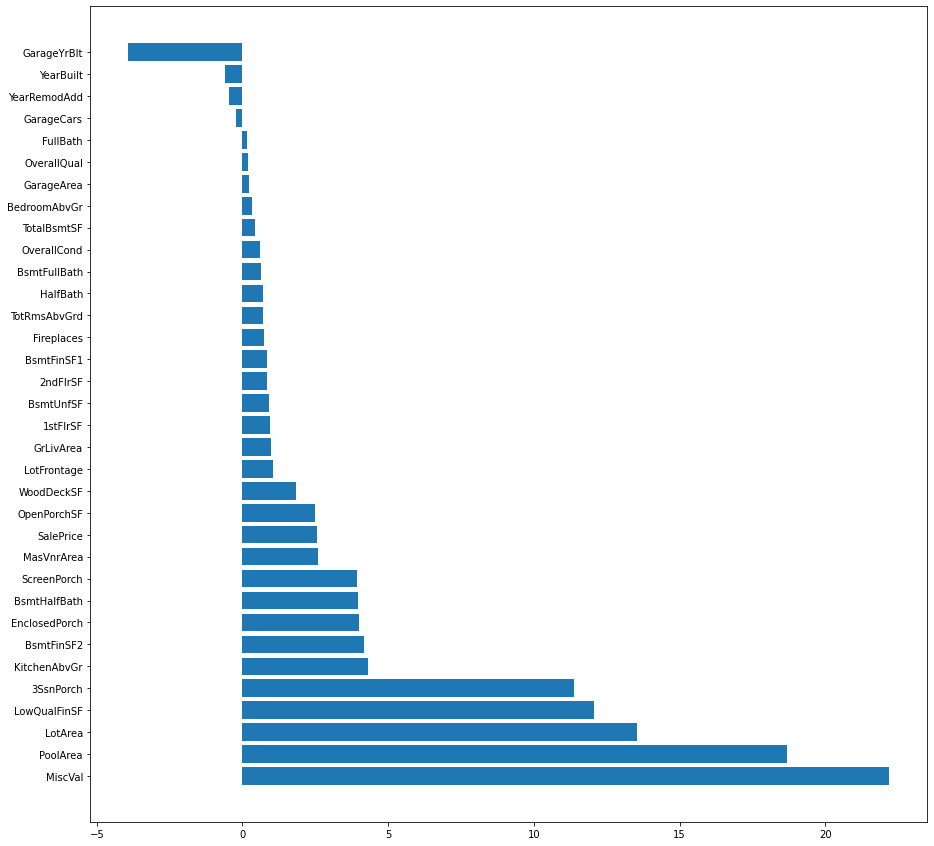

In [60]:
# Find and display skew values for numbers
house_prices_skew=df_house_price_train_numbers.skew().sort_values(ascending=False)
y_pos = np.arange(len(house_prices_skew))
plt.subplots(figsize=(15,15))
plt.barh(y_pos, house_prices_skew,tick_label=house_prices_skew.index)
plt.show()

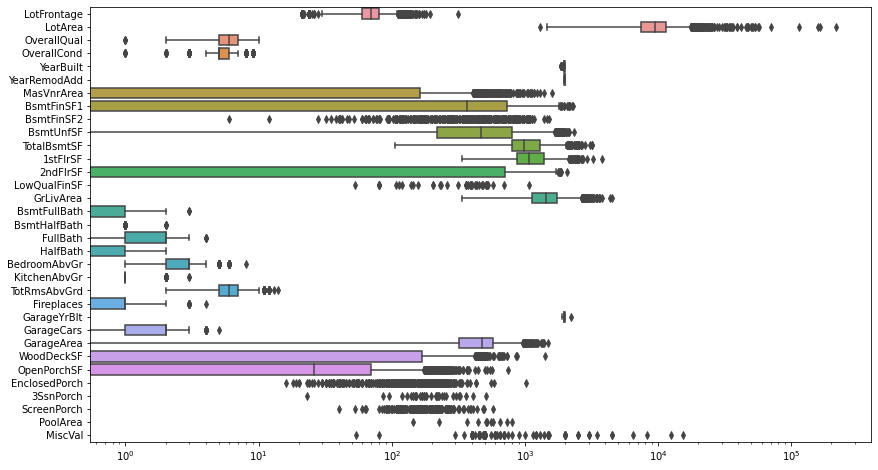

In [61]:
# Box plot for skew of numbers
f, ax = plt.subplots(figsize=(14,8))
ax.set_xscale("log")
sns.boxplot(data=df_house_price_train_numbers.drop(columns='SalePrice'),orient='h')
plt.show()

In [62]:
# Find and remove features with high skew
house_prices_skew_high=house_prices_skew[house_prices_skew > .5]
house_prices_skew_high

MiscVal          22.180773
PoolArea         18.694834
LotArea          13.539368
LowQualFinSF     12.071748
3SsnPorch        11.359992
KitchenAbvGr      4.313446
BsmtFinSF2        4.155167
EnclosedPorch     4.005044
BsmtHalfBath      3.953922
ScreenPorch       3.939960
MasVnrArea        2.592588
SalePrice         2.557267
OpenPorchSF       2.501123
WoodDeckSF        1.847733
LotFrontage       1.051945
GrLivArea         0.974889
1stFlrSF          0.958088
BsmtUnfSF         0.920227
2ndFlrSF          0.853842
BsmtFinSF1        0.838103
Fireplaces        0.723999
TotRmsAbvGrd      0.710660
HalfBath          0.695313
BsmtFullBath      0.620809
OverallCond       0.600091
dtype: float64

Combine Dataframes

In [63]:
df_house_price_train_objects_table_encoded.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition',
       'SalePrice'],
      dtype='object')

In [64]:
df_house_price_train_numbers.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice'],
      dtype='object')

In [65]:
## Cleaned Dataframe
#df_house_prices=pd.concat([df_house_price_train_objects_table_encoded.drop(columns='SalePrice'),df_house_price_train_numbers], axis=1)
#df_house_prices.head()

In [66]:
df_house_prices.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition',
       'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenA

In [67]:
df_house_prices.shape

(2919, 80)

In [68]:
df_house_prices.isnull().sum().sort_values(ascending=False).head(25)

SalePrice       11
BsmtFinSF1      11
LowQualFinSF    11
2ndFlrSF        11
1stFlrSF        11
TotalBsmtSF     11
BsmtUnfSF       11
BsmtFinSF2      11
MasVnrArea      11
BsmtFullBath    11
YearBuilt       11
OverallCond     11
OverallQual     11
LotArea         11
LotFrontage     11
MiscVal         11
GrLivArea       11
YearRemodAdd    11
BsmtHalfBath    11
GarageArea      11
PoolArea        11
FullBath        11
ScreenPorch     11
3SsnPorch       11
OpenPorchSF     11
dtype: int64

In [69]:
df_house_prices=df_house_prices.fillna(df_house_prices.mean())

Objects:\
Verify that there are no missing values

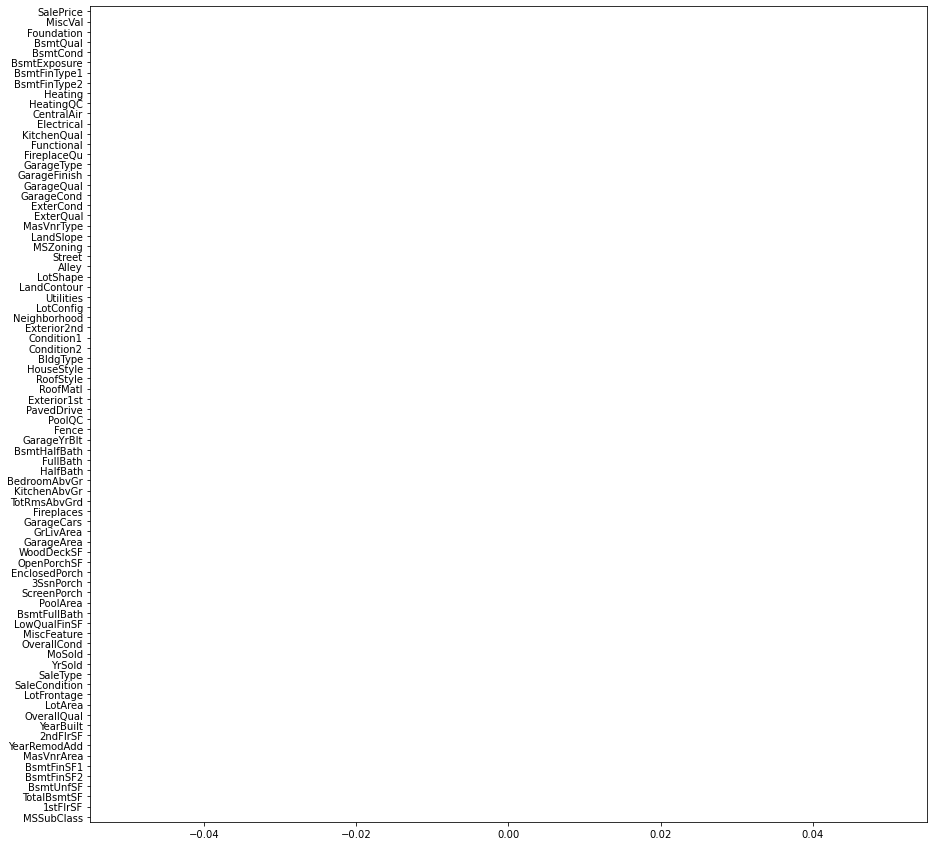

In [70]:
# Bar plot of missing values in the number dataset
plt.subplots(figsize=(15,15))
df_house_prices_missing_data=df_house_prices.isnull().sum().sort_values(ascending=False)
sns.barplot(y=df_house_prices_missing_data.index,x=df_house_prices_missing_data)
plt.show()

Compare Dataframes

In [71]:
# Vs Original Dataframe
df_house_price_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


Re-order Dataframe

In [72]:
# Re-order cleaned dataframe to match original dataframe
df_house_prices=df_house_prices[df_house_price_train.columns]
df_house_prices.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,10,4,4.189655,9.042040,1,0.0,3,3,1,4,...,0.0,0.0,0.0,0.0,0.0,4,2,9,4,12.247699
1,5,4,4.394449,9.169623,1,0.0,3,3,1,2,...,0.0,0.0,0.0,0.0,0.0,7,1,9,4,12.109016
2,10,4,4.234107,9.328212,1,0.0,0,3,1,4,...,0.0,0.0,0.0,0.0,0.0,11,2,9,4,12.317171
3,11,4,4.110874,9.164401,1,0.0,0,3,1,0,...,0.0,0.0,0.0,0.0,0.0,4,0,9,0,11.849405
4,10,4,4.442651,9.565284,1,0.0,0,3,1,2,...,0.0,0.0,0.0,0.0,0.0,3,2,9,4,12.429220


In [73]:
df_house_prices.shape

(2919, 80)

In [74]:
(df_house_prices.iloc[:1460,:]).shape

(1460, 80)

In [75]:
df_house_prices1=df_house_prices.loc[:1460,:]

In [90]:
# Create test / train dataset
X, y = df_house_prices.drop(['SalePrice'], axis = 1), df_house_prices['SalePrice']
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [91]:
# K-Cross Validation


In [92]:
# Build Model - XBoost Gradient Descent
xgb_model1 = XGBRegressor(
)
xgb_model1.fit(X_train, y_train, verbose=False)
y_train_pred1 = xgb_model1.predict(X_train)
y_pred1 = xgb_model1.predict(X_test)

In [93]:
y_train_pred1

array([12.213723, 13.318237, 11.857205, ..., 12.021106, 12.3083  ,
       12.088788], dtype=float32)

In [94]:
#np.exp(y_train_pred1)

In [95]:
# Regression Performance
print('Train r2 score: ', r2_score(y_train_pred1, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred1))
train_mse1 = mean_squared_error(y_train_pred1, y_train)
test_mse1 = mean_squared_error(y_pred1, y_test)
train_rmse1 = np.sqrt(train_mse1)
test_rmse1 = np.sqrt(test_mse1)
print('Train RMSE: %.4f' % train_rmse1)
print('Test RMSE: %.4f' % test_rmse1)

Train r2 score:  0.9825704105936904
Test r2 score:  0.349569532251623
Train RMSE: 0.0372
Test RMSE: 0.2230


In [96]:
df_house_prices.iloc[1460:,:].shape

(1459, 80)

In [97]:
# Treat the test data in the same way as training data. In this case, pull same columns.
test_X = df_house_prices.loc[1460:,:].drop(columns='SalePrice')
# Use the model to make predictions
predicted_prices = xgb_model1.predict(test_X)
# We will look at the predicted prices to ensure we have something sensible.
print(predicted_prices)

[11.977862 12.12092  12.186031 ... 12.280194 12.10901  12.182369]


In [98]:
predicted_prices=np.exp(predicted_prices)
print(predicted_prices)

[159191.38 183674.45 196031.64 ... 215387.56 181499.78 195315.06]


In [99]:
# Regression Performance
print('r2 score: ', r2_score(predicted_prices, df_house_price_sample))
train_mse1 = mean_squared_error(predicted_prices, df_house_price_sample)
train_rmse1 = np.sqrt(train_mse1)
print('RMSE: %.4f' % train_rmse1)

r2 score:  0.45783224348527807
RMSE: 18617.4009


In [86]:
predicted_prices=pd.DataFrame(predicted_prices)

In [87]:
# Save submission in csv
predicted_prices.to_csv('submission.csv', index=False)